# Data Cleaning

## Importing Data

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def load_data():
    global data, data2018, data2017, data2016, data2015, data2014

    def ind_year_col(filepath):
        x = pd.read_csv(filepath)
        year = int(filepath.split('_')[0].split('/')[-1])
        x['Year'] = year
        x.rename(columns={f'{year} Food Insecurity Rate': 'Overall Food Insecurity Rate',
                                 f'{year} Child food insecurity rate': 'Child Food Insecurity Rate',
                                 f'# of Food Insecure Persons in {year}': '# of Food Insecure Persons Overall',
                                 f'# of Food Insecure Children in {year}': '# of Food Insecure Children',
                                 f'% food insecure children in HH w/ HH incomes below 185 FPL in {year}': '% food insecure children in HH w/ HH incomes below 185 FPL',
                                 f'% food insecure children in HH w/ HH incomes above 185 FPL in {year}': '% food insecure children in HH w/ HH incomes above 185 FPL',
                                 f'{year} Cost Per Meal': 'Cost Per Meal',
                                 f'{year} Weighted Annual Food Budget Shortfall': 'Weighted Annual Food Budget Shortfall'}, inplace=True)
        return x


    data = pd.read_csv("./Datasets/2019-2022_FA.csv")
    data2018 = ind_year_col("./Datasets/2018_FA.csv")
    data2017 = ind_year_col("./Datasets/2017_FA.csv")
    data2016 = ind_year_col("./Datasets/2016_FA.csv")
    data2015 = ind_year_col("./Datasets/2015_FA.csv")
    data2014 = ind_year_col("./Datasets/2014_FA.csv")

## Functions

In [276]:
def format_data(x):
# Removing whitespace from column names
    df_dw = x.copy()
    df_dw.columns = df_dw.columns.str.strip()

    # Changing column types to #s
    for col in df_dw.columns.tolist():
        if 'Rate' in col or '%' in col:
            df_dw[col] = df_dw[col].str.strip().str.replace('%', '').astype("float64")/100

    for col in df_dw.columns.tolist():
        if '#' in col:
            df_dw = df_dw[~df_dw[col].str.contains('%|-', na=False)]
            df_dw[col] = df_dw[col].str.strip().str.replace(',', '').astype("float64")


    # Splitting 'County, State' col to just 'County'. Code from Jetbrains' Data Wrangler
    # Split column County, State by delimiter ','
    num_splits = int(min(df_dw['County, State'].str.count(', ').max() + 1, 2))
    if num_splits <= 1:
        raise Exception("num_splits is not sufficient")

    new_columns = [f'County, State_{i + 1}' for i in range(num_splits)]
    split_cols = df_dw['County, State'].str.split(', ', n=num_splits - 1, expand=True)

    col_index = df_dw.columns.get_loc('County, State')
    df_dw = df_dw.drop('County, State', axis=1)
    for i, col in enumerate(new_columns):
        df_dw.insert(col_index + i, col, split_cols[i])

    # Drop Column County, State_2
    df_dw = df_dw.drop(columns=['County, State_2'])
    df_dw.rename(columns={'County, State_1': 'County'}, inplace=True)
    return df_dw

def compare_cols(x, y):
    # Get the set of columns for each DataFrame
    columns_x = set(x.columns)
    columns_y = set(y.columns)

    # Find columns that are in x but not in y
    columns_only_in_x = columns_x - columns_y

    # Find columns that are in y but not in x
    columns_only_in_y = columns_y - columns_x

    # Find columns that are in both x and y
    common_columns = list(columns_x & columns_y)

    # Print the results in a cleaner format
    common_cols_goal = ['# of Food Insecure Persons Overall', '# of Food Insecure Children', 'FIPS', 'Overall Food Insecurity Rate', 'County', '% food insecure children in HH w/ HH incomes below 185 FPL', 'Cost Per Meal', '% food insecure children in HH w/ HH incomes above 185 FPL', 'State', 'Year', 'Weighted Annual Food Budget Shortfall', 'Child Food Insecurity Rate']
    if common_columns == common_cols_goal:
        print('1')
    else:
        print("Columns only in x:")
        for col in columns_only_in_x:
            print(f"  - {col}")

        print("\nColumns only in y:")
        for col in columns_only_in_y:
            print(f"  - {col}")

        print("\nCommon columns:")
        for col in common_columns:
            print(f"  - {col}")

def list_columns(df):
    """
    This function prints all columns of a DataFrame in a neat format.
    """
    print("Columns in DataFrame:")
    for col in df.columns:
        print(f"  - {col}")

## Cleaning the Data

In [289]:
load_data()
data = format_data(data)
data2018 = format_data(data2018)
data2017 = format_data(data2017)
data2016 = format_data(data2016)
data2015 = format_data(data2015)
data2014 = format_data(data2014)

data_full = pd.concat([data, data2018, data2017, data2016, data2015, data2014])

#checks for proper concatenation
print('column match check (1 means good to go):')
compare_cols(data, data2018)
compare_cols(data, data2017)
compare_cols(data, data2016)
compare_cols(data, data2015)
compare_cols(data, data2014)

unique_elements = data_full['Year'].unique()
print(f'\n{unique_elements}')
list_columns(data_full)

column match check (1 means good to go):
1
1
1
1
1

[2019 2020 2021 2022 2018 2017 2016 2015 2014]
Columns in DataFrame:
  - FIPS
  - State
  - County
  - Year
  - Overall Food Insecurity Rate
  - # of Food Insecure Persons Overall
  - Food Insecurity Rate among Black Persons (all ethnicities)
  - Food Insecurity Rate among Hispanic Persons (any race)
  - Food Insecurity Rate among White, non-Hispanic Persons
  - SNAP Threshold
  - % FI ≤ SNAP Threshold
  - % FI > SNAP Threshold
  - Child Food Insecurity Rate
  - # of Food Insecure Children
  - % food insecure children in HH w/ HH incomes below 185 FPL
  - % food insecure children in HH w/ HH incomes above 185 FPL
  - Cost Per Meal
  - Weighted weekly $ needed by FI
  - Weighted Annual Food Budget Shortfall
  - Low Threshold in state
  - Low Threshold Type
  - High Threshold in state
  - High Threshold Type
  - % FI ≤ Low Threshold
  - % FI Btwn Thresholds
  - % FI > High Threshold


In [287]:
data_full

,FIPS,State,County,Year,Overall Food Insecurity Rate,# of Food Insecure Persons Overall,Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",SNAP Threshold,...,Cost Per Meal,Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold
0,1001,AL,Autauga County,2019,0.157,8670.0,0.26,NaN,0.12,130%,...,$ 3.00,$ 16.88,"$ 4,439,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,AL,Autauga County,2020,0.145,8070.0,0.25,NaN,0.09,130%,...,$ 3.22,$ 17.09,"$ 4,184,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,AL,Autauga County,2021,0.133,7770.0,0.23,NaN,0.09,130%,...,$ 3.60,$ 20.99,"$ 4,947,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001,AL,Autauga County,2022,0.151,8860.0,0.23,NaN,0.11,130%,...,$ 4.01,$ 24.86,"$ 6,680,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003,AL,Baldwin County,2019,0.134,28590.0,0.26,0.1,0.11,130%,...,$ 3.66,$ 20.63,"$ 17,895,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WY,Sweetwater County,2014,0.110,4880.0,NaN,NaN,NaN,NaN,...,$3.22,NaN,"$2,776,000.00",130%,SNAP,185%,Other Nutrition Program,0.434,0.105,0.461
3138,56039,WY,Teton County,2014,0.117,2560.0,NaN,NaN,NaN,NaN,...,$4.12,NaN,"$1,862,000.00",130%,SNAP,185%,Other Nutrition Program,0.358,0.205,0.437
3139,56041,WY,Uinta County,2014,0.131,2740.0,NaN,NaN,NaN,NaN,...,$3.02,NaN,"$1,459,000.00",130%,SNAP,185%,Other Nutrition Program,0.482,0.166,0.352
3140,56043,WY,Washakie County,2014,0.126,1070.0,NaN,NaN,NaN,NaN,...,$3.10,NaN,"$586,000.00",130%,SNAP,185%,Other Nutrition Program,0.502,0.195,0.303


# Data Analysis

In [284]:
# Group by 'Year' and calculate the mean of 'Overall Food Insecurity Rate'
data_full.groupby('Year')[['# of Food Insecure Persons Overall', '# of Food Insecure Children']].sum()

,# of Food Insecure Persons Overall,# of Food Insecure Children
Year,,
2014,44881210.0,15714480.0
2015,42822870.0,14490920.0
2016,41502080.0,13701510.0
2017,40293940.0,13271840.0
2018,38053930.0,12047610.0
2019,36960090.0,11290770.0
2020,37580520.0,12308830.0
2021,33826480.0,9832210.0
2022,42636120.0,13120980.0


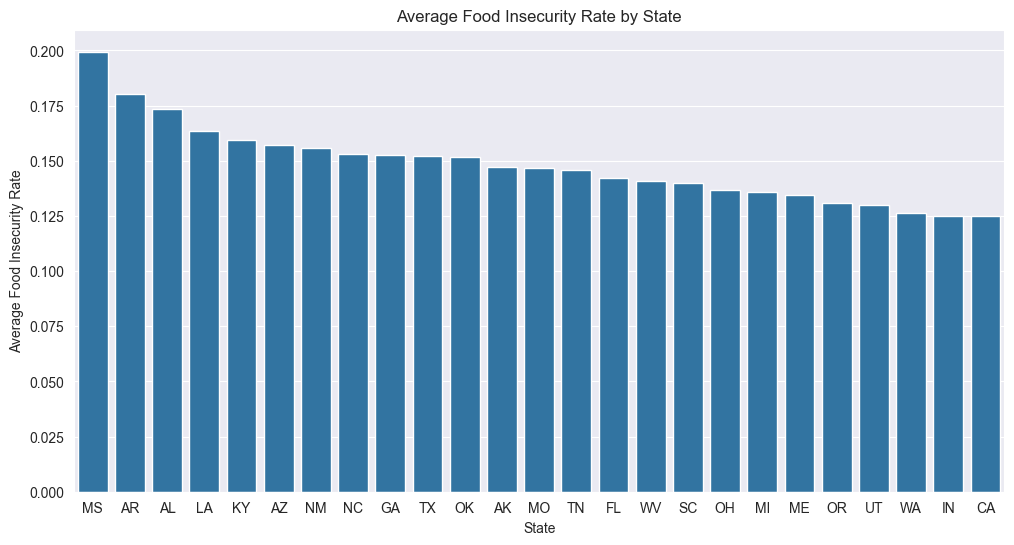

In [285]:
# Histogram of 'Overall Food Insecurity Rate' per state (top 25), averaged over 2019-2022, sorted by descending order
plt.figure(figsize=(12, 6))
avg_insecurity_rate = data_full.groupby('State')[['Overall Food Insecurity Rate']].mean().reset_index().sort_values(by='Overall Food Insecurity Rate', ascending=False).head(25)
sns.barplot(data=avg_insecurity_rate, x='State', y='Overall Food Insecurity Rate')
plt.title('Average Food Insecurity Rate by State')
plt.xlabel('State')
plt.ylabel('Average Food Insecurity Rate')
plt.xticks(rotation=0)
plt.show()